## Panel Analysis and Exploration of Data Relative to the Start of Crisis

In [93]:
# package and data importing

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from linearmodels.panel import PanelOLS

wri_df = pd.read_excel('PS_WRI_data_nonlag_TRIMMED.xlsx')

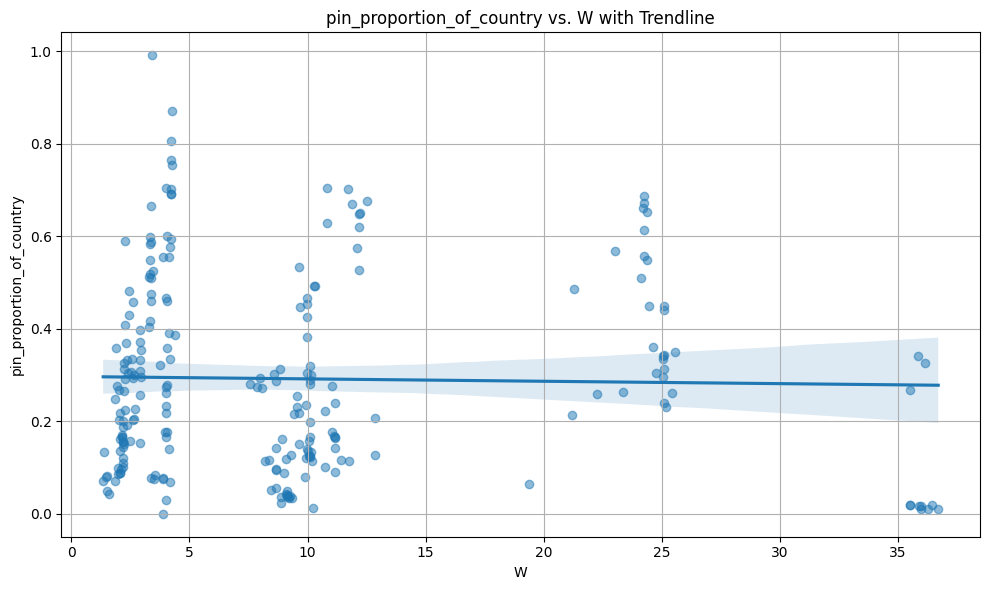

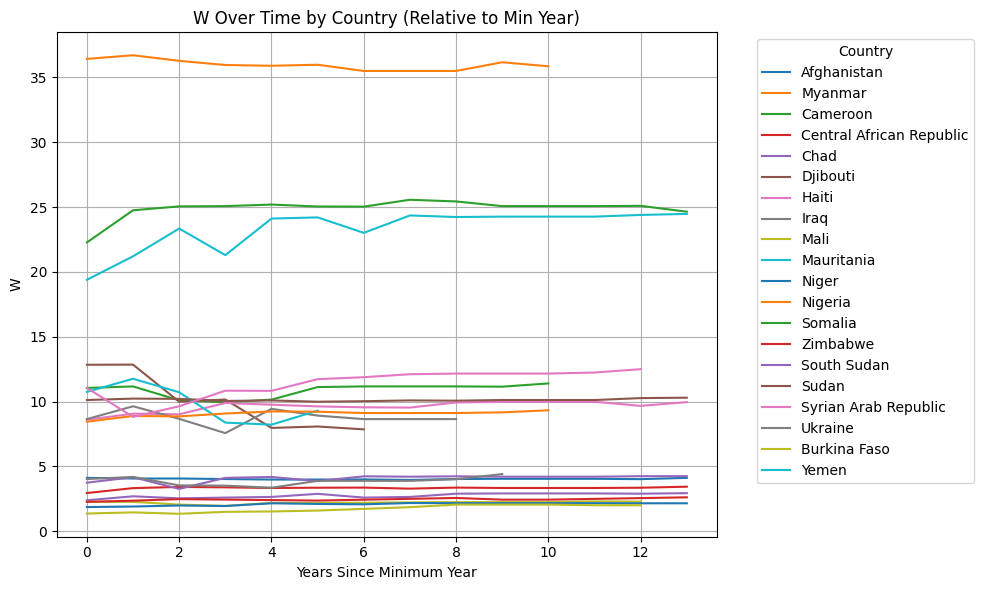


Regression Results (pin_proportion_of_country vs. W):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.004
Method:                        Least Squares   F-statistic:                    0.1160
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):              0.734
Time:                               02:06:22   Log-Likelihood:                 37.942
No. Observations:                        236   AIC:                            -71.88
Df Residuals:                            234   BIC:                            -64.96
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [94]:
# converting the R-based approach from the nd-gain analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
ocha = pd.read_csv("GHO 2025 Development Needs.xlsx - Weighted averages.csv")
un_pop = pd.read_excel("Total Population by Sex data_v2.xlsx")
wri_reload_df = pd.read_excel("WRI_maunal_clean_W.xlsx")

# Clean and transform ocha
ocha['people_in_need'] = ocha['people_in_need'].str.replace(",", "").str.strip() # Remove commas and leading/trailing spaces
ocha['people_in_need'] = ocha['people_in_need'].replace(' -   ', np.nan) # Replace "-" with NaN
ocha['numeric_pin'] = pd.to_numeric(ocha['people_in_need'], errors='coerce')
ocha = ocha[["country", "calendar_year", "year_of_crisis", "numeric_pin", "years_since_crisis"]]
ocha['country_year'] = ocha['country'] + ocha['calendar_year'].astype(str)

# Clean and transform un_pop
un_pop['country_year'] = un_pop['Country'] + un_pop['Time'].astype(str)
un_pop['total_country_population'] = pd.to_numeric(un_pop['Value'], errors='coerce') # Handle potential errors in conversion

# Merge ocha and un_pop
merged_ocha_un = pd.merge(un_pop, ocha, on="country_year")
merged_ocha_un = merged_ocha_un[["country_year", "Country", "total_country_population", "calendar_year", "numeric_pin", "years_since_crisis", "year_of_crisis"]]
merged_ocha_un['pin_proportion_of_country'] = merged_ocha_un['numeric_pin'] / merged_ocha_un['total_country_population']
merged_ocha_un = merged_ocha_un.rename(columns={'calendar_year': 'Year'})


# Clean and transform wri_reload_df
wri_reload_df_melted = pd.melt(wri_reload_df, id_vars=['Country'], var_name='Year_Variable', value_name='W') # Only melt for 'W'
wri_reload_df_melted['Year'] = wri_reload_df_melted['Year_Variable'].str[:4].astype(int)
wri_reload_df_melted = wri_reload_df_melted[['Country', 'Year', 'W']] # Keep only necessary columns

# Merge WRI, OCHA, UN Pop Data
combined_data = pd.merge(merged_ocha_un, wri_reload_df_melted, on=['Country', 'Year'], how='inner')
combined_data['pin_proportion_of_country'] = combined_data['pin_proportion_of_country'].fillna(0)
combined_data['years_since_min_year'] = combined_data.groupby('Country')['Year'].transform(lambda x: x - x.min())

## --- Analysis Views --- ##
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='W', y='pin_proportion_of_country', data=combined_data, scatter_kws={'alpha':0.5})
plt.xlabel("W")
plt.ylabel("pin_proportion_of_country")  
plt.title("pin_proportion_of_country vs. W with Trendline")  
plt.grid(True)
plt.tight_layout()
plt.show()


# Line plot for each country (using years since min year [crisis year zero])
plt.figure(figsize=(10, 6))
for country in combined_data['Country'].unique():
    country_data = combined_data[combined_data['Country'] == country]
    plt.plot(country_data['years_since_min_year'], country_data['W'], label=country)

plt.xlabel("Years Since Minimum Year")
plt.ylabel("W")
plt.title("W Over Time by Country (Relative to Min Year)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Regressing W to predict PiN 
X = combined_data['W'] 
X = sm.add_constant(X)
y = combined_data['pin_proportion_of_country'] 
model = sm.OLS(y, X).fit()
print("\nRegression Results (pin_proportion_of_country vs. W):")
print(model.summary())

# Correlation between W and PiN to confirm usability
correlation = combined_data['pin_proportion_of_country'].corr(combined_data['W']) 
print(f"Correlation between pin_proportion_of_country and W: {correlation}")

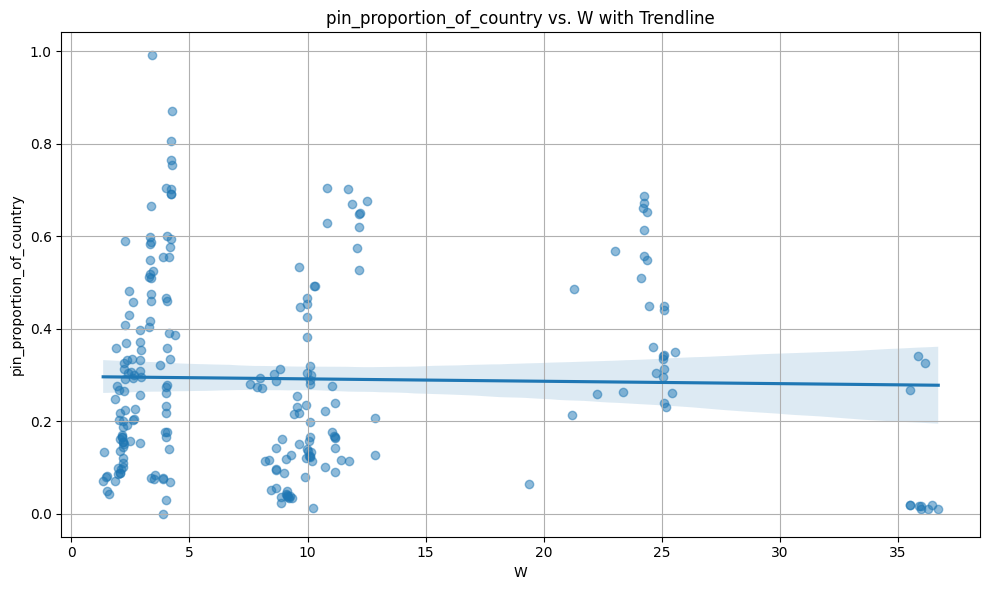

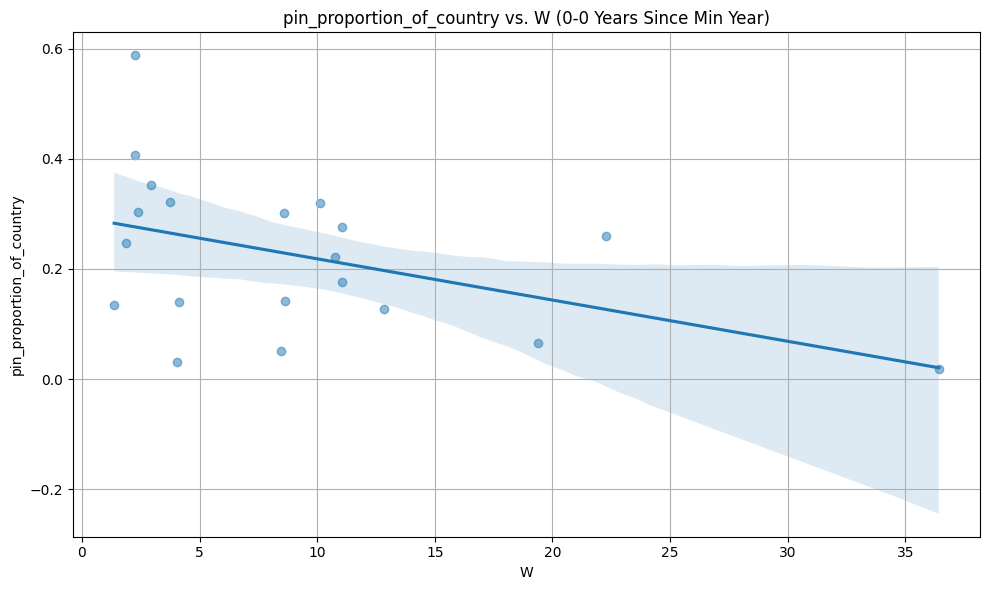


Regression Results (pin_proportion_of_country vs. W (0-0 Years Since Min Year)):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.205
Model:                                   OLS   Adj. R-squared:                  0.161
Method:                        Least Squares   F-statistic:                     4.655
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):             0.0447
Time:                               02:06:22   Log-Likelihood:                 13.356
No. Observations:                         20   AIC:                            -22.71
Df Residuals:                             18   BIC:                            -20.72
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|    

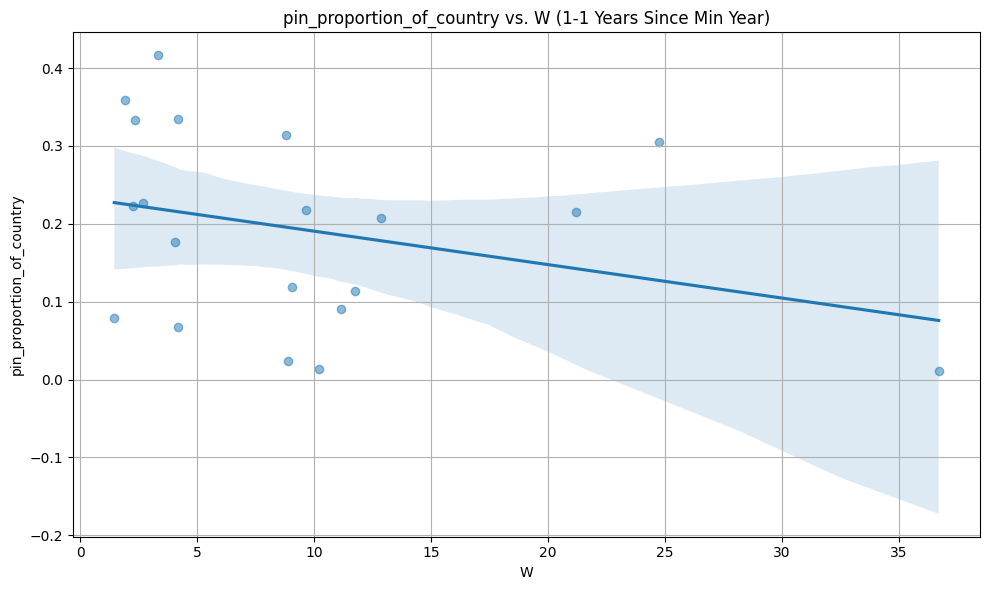


Regression Results (pin_proportion_of_country vs. W (1-1 Years Since Min Year)):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.096
Model:                                   OLS   Adj. R-squared:                  0.046
Method:                        Least Squares   F-statistic:                     1.916
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):              0.183
Time:                               02:06:22   Log-Likelihood:                 14.881
No. Observations:                         20   AIC:                            -25.76
Df Residuals:                             18   BIC:                            -23.77
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|    

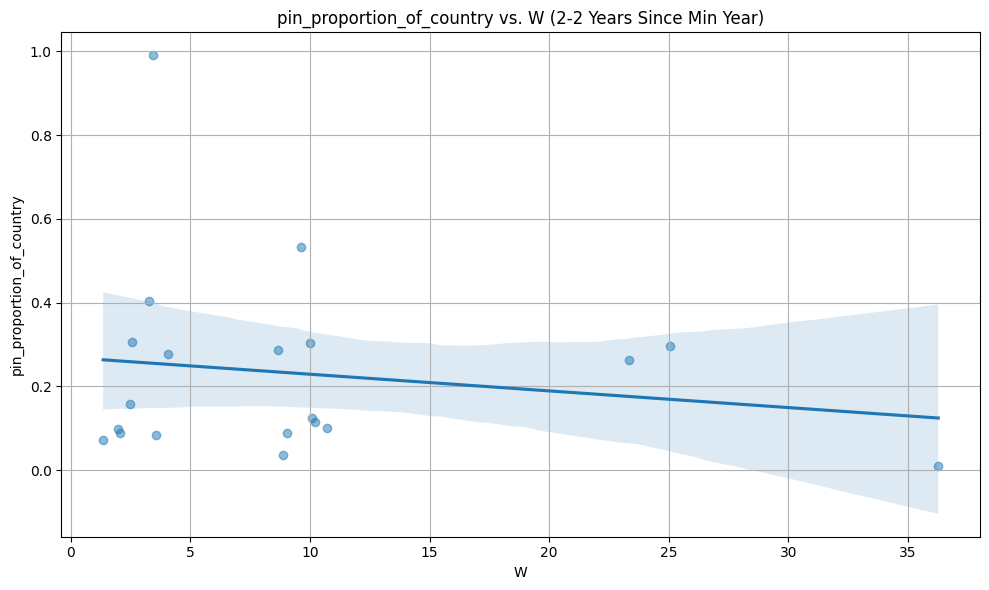


Regression Results (pin_proportion_of_country vs. W (2-2 Years Since Min Year)):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.026
Model:                                   OLS   Adj. R-squared:                 -0.028
Method:                        Least Squares   F-statistic:                    0.4798
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):              0.497
Time:                               02:06:22   Log-Likelihood:                 2.2593
No. Observations:                         20   AIC:                           -0.5187
Df Residuals:                             18   BIC:                             1.473
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|    

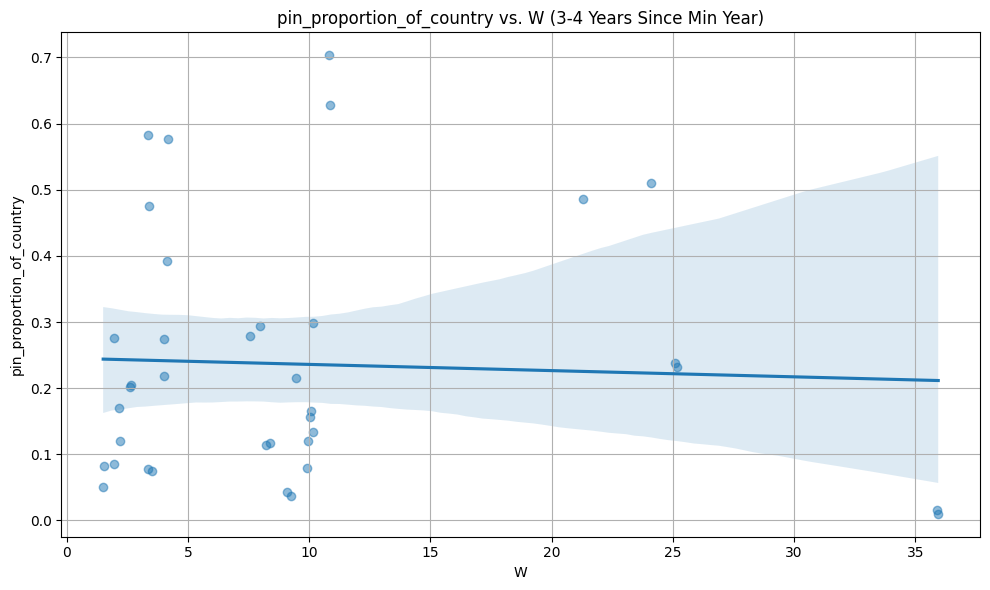


Regression Results (pin_proportion_of_country vs. W (3-4 Years Since Min Year)):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                 -0.026
Method:                        Least Squares   F-statistic:                   0.07292
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):              0.789
Time:                               02:06:22   Log-Likelihood:                 10.103
No. Observations:                         37   AIC:                            -16.21
Df Residuals:                             35   BIC:                            -12.98
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|    

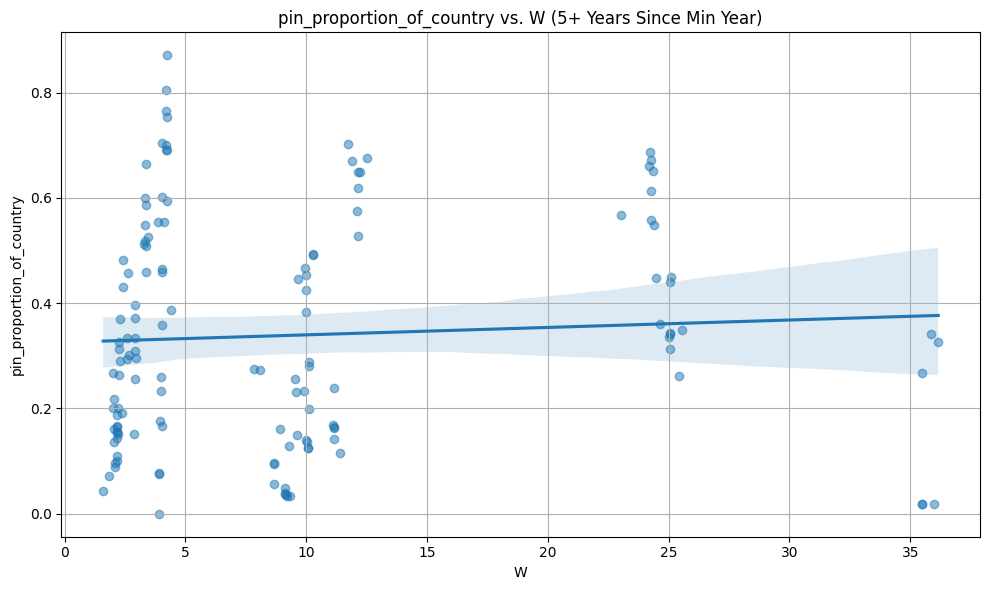


Regression Results (pin_proportion_of_country vs. W (5+ Years Since Min Year)):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                 -0.004
Method:                        Least Squares   F-statistic:                    0.4873
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):              0.486
Time:                               02:06:22   Log-Likelihood:                 17.612
No. Observations:                        139   AIC:                            -31.22
Df Residuals:                            137   BIC:                            -25.36
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|     

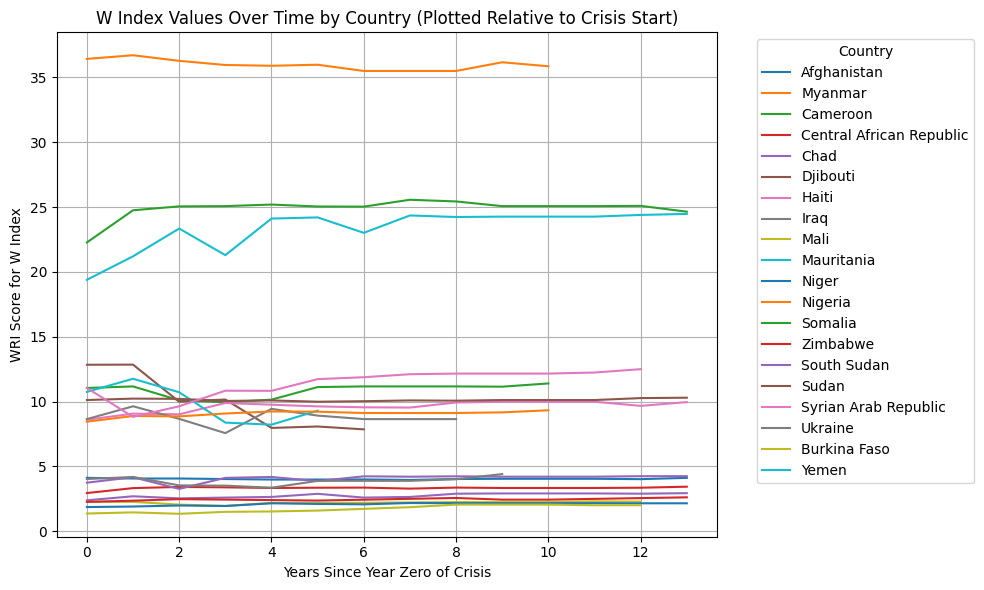


Regression Results (pin_proportion_of_country vs. W):
                                OLS Regression Results                               
Dep. Variable:     pin_proportion_of_country   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.004
Method:                        Least Squares   F-statistic:                    0.1160
Date:                       Thu, 20 Feb 2025   Prob (F-statistic):              0.734
Time:                               02:06:22   Log-Likelihood:                 37.942
No. Observations:                        236   AIC:                            -71.88
Df Residuals:                            234   BIC:                            -64.96
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [95]:
# time lagged approach -- building on the R-based approach from Steph
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
ocha = pd.read_csv("GHO 2025 Development Needs.xlsx - Weighted averages.csv")
un_pop = pd.read_excel("Total Population by Sex data_v2.xlsx")
wri_reload_df = pd.read_excel("WRI_maunal_clean_W.xlsx")

# Clean and transform ocha
ocha['people_in_need'] = ocha['people_in_need'].str.replace(",", "").str.strip() # Remove commas and leading/trailing spaces
ocha['people_in_need'] = ocha['people_in_need'].replace(' -   ', np.nan) # Replace "-" with NaN
ocha['numeric_pin'] = pd.to_numeric(ocha['people_in_need'], errors='coerce')
ocha = ocha[["country", "calendar_year", "year_of_crisis", "numeric_pin", "years_since_crisis"]]
ocha['country_year'] = ocha['country'] + ocha['calendar_year'].astype(str)

# Clean and transform un_pop
un_pop['country_year'] = un_pop['Country'] + un_pop['Time'].astype(str)
un_pop['total_country_population'] = pd.to_numeric(un_pop['Value'], errors='coerce') # Handle potential errors in conversion

# Merge ocha and un_pop
merged_ocha_un = pd.merge(un_pop, ocha, on="country_year")
merged_ocha_un = merged_ocha_un[["country_year", "Country", "total_country_population", "calendar_year", "numeric_pin", "years_since_crisis", "year_of_crisis"]]
merged_ocha_un['pin_proportion_of_country'] = merged_ocha_un['numeric_pin'] / merged_ocha_un['total_country_population']
merged_ocha_un = merged_ocha_un.rename(columns={'calendar_year': 'Year'})


# Clean and transform wri_reload_df
wri_reload_df_melted = pd.melt(wri_reload_df, id_vars=['Country'], var_name='Year_Variable', value_name='W') # Only melt for 'W'
wri_reload_df_melted['Year'] = wri_reload_df_melted['Year_Variable'].str[:4].astype(int)
wri_reload_df_melted = wri_reload_df_melted[['Country', 'Year', 'W']] # Keep only necessary columns

# Merge with nd_gain
combined_data = pd.merge(merged_ocha_un, wri_reload_df_melted, on=['Country', 'Year'], how='inner')
combined_data['pin_proportion_of_country'] = combined_data['pin_proportion_of_country'].fillna(0)
combined_data['years_since_min_year'] = combined_data.groupby('Country')['Year'].transform(lambda x: x - x.min())

# --- Analysis ---
# Scatter plot with regression line (Corrected x and y axes)
plt.figure(figsize=(10, 6))
sns.regplot(x='W', y='pin_proportion_of_country', data=combined_data, scatter_kws={'alpha':0.5})  # Corrected order
plt.xlabel("W")  # Corrected label
plt.ylabel("pin_proportion_of_country")  # Corrected label
plt.title("pin_proportion_of_country vs. W with Trendline")  # Corrected title
plt.grid(True)
plt.tight_layout()
plt.show()


# Define time periods (adjust as needed)
time_periods = [0, 1, 2, 3, 5] 
for i in range(len(time_periods)):
    start_year = time_periods[i]
    if i < len(time_periods) - 1:
        end_year = time_periods[i+1]
        subset = combined_data[(combined_data['years_since_min_year'] >= start_year) & (combined_data['years_since_min_year'] < end_year)]
        title = f"pin_proportion_of_country vs. W ({start_year}-{end_year-1} Years Since Min Year)"
    else:
        subset = combined_data[combined_data['years_since_min_year'] >= start_year]
        title = f"pin_proportion_of_country vs. W ({start_year}+ Years Since Min Year)"
    
    if len(subset) > 0: # Check if the subset is not empty
        plt.figure(figsize=(10, 6))
        sns.regplot(x='W', y='pin_proportion_of_country', data=subset, scatter_kws={'alpha':0.5})
        plt.xlabel("W")
        plt.ylabel("pin_proportion_of_country")
        plt.title(title)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Regression for this time period
        X = subset['W']
        X = sm.add_constant(X)
        y = subset['pin_proportion_of_country']
        model = sm.OLS(y, X).fit()
        print(f"\nRegression Results ({title}):")
        print(model.summary())

        # Correlation for this time period
        correlation = subset['pin_proportion_of_country'].corr(subset['W'])
        print(f"Correlation between pin_proportion_of_country and W ({title}): {correlation}")
    else:
        print(f"No data for time period {start_year}+")



# Line plot for each country (using years since min year)
plt.figure(figsize=(10, 6))
for country in combined_data['Country'].unique():
    country_data = combined_data[combined_data['Country'] == country]
    plt.plot(country_data['years_since_min_year'], country_data['W'], label=country)

plt.xlabel("Years Since Year Zero of Crisis")
plt.ylabel("WRI Score for W Index")
plt.title("W Index Values Over Time by Country (Plotted Relative to Crisis Start)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Regression - Corrected
X = combined_data['W']  # Independent variable is W
X = sm.add_constant(X)
y = combined_data['pin_proportion_of_country']  # Dependent variable is pin_proportion_of_country
model = sm.OLS(y, X).fit()
print("\nRegression Results (pin_proportion_of_country vs. W):")
print(model.summary())

# Correlation - Corrected
correlation = combined_data['pin_proportion_of_country'].corr(combined_data['W']) 
print(f"Correlation between pin_proportion_of_country and W: {correlation}")

In [96]:
# Panel approach
# --- Ensure consistent data types for 'Country' and 'Year' ---
panel_df = combined_data.copy().reset_index()
panel_df['Country'] = panel_df['Country'].astype(str)
panel_df['Year'] = panel_df['Year'].astype(int)

'''
# plot checking step
for country in panel_df['Country'].unique():
    plt.figure()  # New figure for each country
    country_data = panel_df[panel_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['W'], label='W')
    plt.plot(country_data['Year'], country_data['pin_proportion_of_country'], label='PiN')
    plt.title(f"Time Series for {country}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    print(f"Descriptive Statistics for W in {country}:\n{country_data['W'].describe()}")
    print(f"Number of unique W values for {country}:\n{country_data['W'].nunique()}")
'''

# --- Panel Data Analysis for each time period ---
time_periods = [0, 1, 2, 3, 5]

for i in range(len(time_periods)):
    start_year = time_periods[i]
    if i < len(time_periods) - 1:
        end_year = time_periods[i + 1]
        title = f"Panel Regression Results ({start_year}-{end_year-1} Years Since Crisis Year Zero)"
    else:
        end_year = panel_df['years_since_min_year'].max() + 1
        title = f"Panel Regression Results ({start_year}+ Years Since Crisis Year Zero)"

    subset = panel_df[
        (panel_df['years_since_min_year'] >= start_year) & (panel_df['years_since_min_year'] < end_year)
    ]

    if len(subset) > 0:
        print(f"\n--- {title} ---") #Separator for clarity
        print(f"Number of observations in subset: {len(subset['Country'].unique())}")
        print(f"Countries present in subset: {subset['Country'].unique()}") # Confirming country names
        print(f"Years present in subset: {subset['Year'].unique()}") # explicitly indicating the years present

        subset = subset.set_index(['Country', 'Year'])

        y = subset[['pin_proportion_of_country']]
        X = subset[['W']]
        X = sm.add_constant(X)

        try:
            model = PanelOLS(y, X, entity_effects=True).fit()
            print(model)

            # --- Adjusted R-squared calculation ---
            n = len(subset)  # Number of observations in the subset
            k = X.shape[1] + len(subset.index.get_level_values('Country').unique()) -1  # Number of parameters
            r_squared = model.rsquared
            adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

            print(f"Adjusted R-squared for {title}: {adjusted_r_squared}")

        except Exception as e: # Catch any exception for diagnosis
            print(f"Error in {title}: {e}")

        subset = subset.reset_index()

    else:
        print(f"No data for time period {start_year}+")


--- Panel Regression Results (0-0 Years Since Crisis Year Zero) ---
Number of observations in subset: 20
Countries present in subset: ['Afghanistan' 'Myanmar' 'Cameroon' 'Central African Republic' 'Chad'
 'Djibouti' 'Haiti' 'Iraq' 'Mali' 'Mauritania' 'Niger' 'Nigeria' 'Somalia'
 'Zimbabwe' 'South Sudan' 'Sudan' 'Syrian Arab Republic' 'Ukraine'
 'Burkina Faso' 'Yemen']
Years present in subset: [2011 2014 2012 2015]
Error in Panel Regression Results (0-0 Years Since Crisis Year Zero): 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          const, W

Set drop_absorbed=True to automatically drop absorbed variables.


--- Panel Regression Results (1-1 Years Since Crisis Year Zero) 

In [97]:
'''
# building our data for panel format application -- WRI specific -- OLD

# --- Data Preparation ---

# Melt to long format
country_col = [col for col in wri_df.columns if 'country' in col.lower()][0] #Find the country column, case insensitive.


long_data = pd.melt(wri_df,
                    id_vars=[country_col],
                    var_name='year_category',
                    value_name='score')

# Extract year and category 
long_data[['year', 'category']] = long_data['year_category'].str.split('_', expand=True)
long_data['year'] = long_data['year'].astype(int)

long_data.drop(columns=['year_category'], inplace=True)
long_data.rename(columns={country_col: 'country'}, inplace=True)

## --- Panel Regression --- ##
long_data = long_data.set_index(['country', 'year'])
regressors = pd.get_dummies(long_data['category'], drop_first=True)
model_fe_panel = PanelOLS(long_data['score'], regressors, entity_effects=True, time_effects=True).fit()

print("Panel Regression Results:")
print(model_fe_panel)
print("\nRobust standard errors:")
print(model_fe_panel.std_errors)

## --- Exporting Results to a Table --- ##
# Dictionary to store the results
results_dict = {
    'Coefficient': model_fe_panel.params,
    'Std. Error': model_fe_panel.std_errors,
    't-statistic': model_fe_panel.tstats,
    'p-value': model_fe_panel.pvalues
}

# Convert the dictionary to a Pandas DataFrame
results_df = pd.DataFrame(results_dict)

# Format the table
results_df = results_df.round(3) 
results_df.index.name = "Variable" 

# Export to CSV, check quality 
results_df.to_csv('panel_regression_results.csv') 
print(results_df)

## --- Key Statistical Measures --- ##

# R-squared
r_squared = model_fe_panel.rsquared
print(f"R-squared: {r_squared:.3f}")

# Number of observations
nobs = model_fe_panel.nobs
print(f"Number of Observations: {nobs}")

# Entity and Time Effects included
def effects_status(model_result, effect_type):
    """Checks and returns the status of entity or time effects."""
    try:
        if effect_type == "entity":
            included = model_result.params.index.str.startswith("entity").any()
        elif effect_type == "time":
            included = model_result.params.index.str.startswith("time").any()
        else:
            return "Unknown effect type"
        return "Included" if included else "Not Included"
    except AttributeError:
      return "Not Applicable"

entity_effects_status = effects_status(model_fe_panel, "entity")
time_effects_status = effects_status(model_fe_panel, "time")

print(f"Entity Effects: {entity_effects_status}")
print(f"Time Effects: {time_effects_status}")
'''

'\n# building our data for panel format application -- WRI specific -- OLD\n\n# --- Data Preparation ---\n\n# Melt to long format\ncountry_col = [col for col in wri_df.columns if \'country\' in col.lower()][0] #Find the country column, case insensitive.\n\n\nlong_data = pd.melt(wri_df,\n                    id_vars=[country_col],\n                    var_name=\'year_category\',\n                    value_name=\'score\')\n\n# Extract year and category \nlong_data[[\'year\', \'category\']] = long_data[\'year_category\'].str.split(\'_\', expand=True)\nlong_data[\'year\'] = long_data[\'year\'].astype(int)\n\nlong_data.drop(columns=[\'year_category\'], inplace=True)\nlong_data.rename(columns={country_col: \'country\'}, inplace=True)\n\n## --- Panel Regression --- ##\nlong_data = long_data.set_index([\'country\', \'year\'])\nregressors = pd.get_dummies(long_data[\'category\'], drop_first=True)\nmodel_fe_panel = PanelOLS(long_data[\'score\'], regressors, entity_effects=True, time_effects=True)

In [98]:
'''
# Cross-sectional regression approach -- OLD
import statsmodels.formula.api as smf 

# setting up the year zero data
year_zero_df = pd.read_csv('developmentneeds_GHO2025.csv')
year_zero_df.rename(columns={'country':'country', 'calendar_year':'year'}, inplace=True)
year_zero_df['year'] = year_zero_df['year'].astype(int)

# creating a merged stream
cross_copy = long_data.reset_index()
wri_merged_df = pd.merge(cross_copy, year_zero_df, on= ['country', 'year'], how= 'left')

for country in wri_merged_df['country'].unique():
    # 3. Filter data for the current country and its crisis year:
    country_data = wri_merged_df[wri_merged_df['country'] == country]
    year_of_crisis = country_data['year_of_crisis'].iloc[0] #Get the year of crisis for the country.
    cross_sectional_data = country_data[country_data['year'] == year_of_crisis].copy()

    # 4. Handle Missing Values (Important - same as before, but inside the loop):
    cross_sectional_data.dropna(subset=['people_in_need', 'number_of_refugees', 'number_of_IDPs'], inplace=True)

    # 5. Cross-sectional Regression:
    if not cross_sectional_data.empty:  # Check if there's any data for the country
        model = smf.ols("score ~ people_in_need + number_of_refugees + number_of_IDPs", data=cross_sectional_data).fit()
        print(f"\n--- Results for {country} (Year: {year_of_crisis}) ---")
        print(model.summary())
    else:
        print(f"\n--- No data for {country} in their year of crisis ({year_of_crisis}) ---")


# filtering to target year:
cross_sectional_data = cross_copy[cross_copy['year'] == year_to_analyze].copy()

# aggregating our multiple observations per country
cross_sectional_data = cross_sectional_data.groupby('country')['score'].sum().reset_index()


# --- Cross-Sectional Regression ---
csr_model = smf.ols("score ~ 1", data=cross_sectional_data).fit() #The 1 represents the intercept.

print(csr_model.summary())
'''

'\n# Cross-sectional regression approach -- OLD\nimport statsmodels.formula.api as smf \n\n# setting up the year zero data\nyear_zero_df = pd.read_csv(\'developmentneeds_GHO2025.csv\')\nyear_zero_df.rename(columns={\'country\':\'country\', \'calendar_year\':\'year\'}, inplace=True)\nyear_zero_df[\'year\'] = year_zero_df[\'year\'].astype(int)\n\n# creating a merged stream\ncross_copy = long_data.reset_index()\nwri_merged_df = pd.merge(cross_copy, year_zero_df, on= [\'country\', \'year\'], how= \'left\')\n\nfor country in wri_merged_df[\'country\'].unique():\n    # 3. Filter data for the current country and its crisis year:\n    country_data = wri_merged_df[wri_merged_df[\'country\'] == country]\n    year_of_crisis = country_data[\'year_of_crisis\'].iloc[0] #Get the year of crisis for the country.\n    cross_sectional_data = country_data[country_data[\'year\'] == year_of_crisis].copy()\n\n    # 4. Handle Missing Values (Important - same as before, but inside the loop):\n    cross_section